leaves_adjusted/Train
(256, 256, 3)
[[[151 149 170]
  [183 181 202]
  [164 162 183]
  ...
  [192 193 213]
  [192 193 213]
  [201 202 222]]

 [[175 173 194]
  [171 169 190]
  [156 154 175]
  ...
  [194 195 215]
  [200 201 221]
  [210 211 231]]

 [[191 189 210]
  [170 168 189]
  [163 161 182]
  ...
  [182 183 203]
  [184 185 205]
  [185 186 206]]

 ...

 [[ 97  89 110]
  [113 105 126]
  [ 96  88 109]
  ...
  [ 96  91 113]
  [153 148 170]
  [ 77  72  94]]

 [[100  92 113]
  [103  95 116]
  [143 135 156]
  ...
  [ 90  85 107]
  [138 133 155]
  [116 111 133]]

 [[101  93 114]
  [122 114 135]
  [139 131 152]
  ...
  [110 105 127]
  [109 104 126]
  [101  96 118]]]


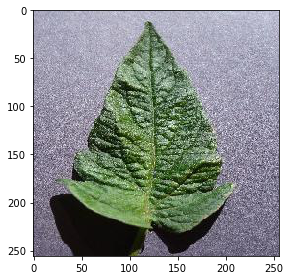

In [1]:
train_root  = "leaves_adjusted/Train"
test_root = "leaves_adjusted/Test"
print(train_root)

from skimage import io
image = io.imread("leaves/Train/tomato/3247a6d7-a473-414f-af51-2d8de917ee82___RS_HL 9622.JPG")
print(image.shape)
print(image) 
io.imshow(image)

batch_size = 18 # 每一批处理这么多图片


In [2]:
from keras.preprocessing.image import ImageDataGenerator

Generator = ImageDataGenerator()
train_data = Generator.flow_from_directory(train_root, (224, 224), batch_size=batch_size) # 把图片的尺寸归一为244*244，为了后面模型的输出（方便vgg设置好的权重）
test_data = Generator.flow_from_directory(test_root, (224, 224), batch_size=batch_size,shuffle=False)

# #optional
# print(train_data[0][0][0].shape)
# print(len(train_data))
# print(len(train_data[0])) #2, 1st image, 2nd is label
# print(train_data[0][1])
# #print(train_data[0])
# print(len(train_data[0][0])) #1st batch of 10 data
# print(len(train_data[0][0][0])) #the image, the vertical
# print(len(train_data[0][0][0][0])) #the image, the horizontal
# print(len(train_data[0][0][0][0][0])) #the image, RGB

Found 3198 images belonging to 3 classes.
Found 450 images belonging to 3 classes.


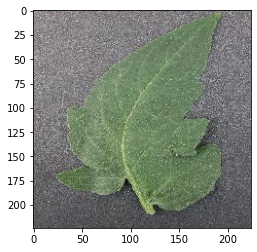

In [3]:
import tensorflow as tf
from matplotlib.pyplot import imshow
import os

im = train_data[0][0][1]
img = tf.keras.preprocessing.image.array_to_img(im)
imshow(img)


In [4]:
num_classes = len([i for i in os.listdir(train_root)])
print(num_classes)

3


In [5]:
import keras
from keras.models import Sequential
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

model = Sequential()

# model.add(Conv2D(64, (3, 3), input_shape=(224, 224, 3), activation='relu',padding='same'))
model.add(Conv2D(64, (3, 3), input_shape=(224, 224, 3), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.5))


# model.add(Conv2D(128, (3, 3), activation='relu',padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.5))


# model.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
model.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.5))


# model.add(Conv2D(512, (3, 3), activation='relu',padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.5))


# model.add(Conv2D(512, (3, 3), activation='relu',padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.2))


model.add(Flatten())


model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))


model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.25))


model.add(Dense(num_classes, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 256)       295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 256)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 512)       1

In [6]:
# opt = keras.optimizers.rmsprop_v2()
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])
hty = model.fit(train_data, batch_size = batch_size, epochs=3,validation_data=test_data)
# model.evaluate(test_data)

Epoch 1/3
178/178 [==============================] - 266s 1s/step - loss: 26.2540 - accuracy: 0.8455 - val_loss: 1.6836 - val_accuracy: 0.5822
Epoch 2/3
178/178 [==============================] - 174s 977ms/step - loss: 0.2816 - accuracy: 0.9387 - val_loss: 0.0917 - val_accuracy: 0.9889
Epoch 3/3
178/178 [==============================] - 98s 551ms/step - loss: 0.0712 - accuracy: 0.9747 - val_loss: 0.0264 - val_accuracy: 0.9933


In [7]:
print(hty.history)
loss = hty.history['loss']
acc = hty.history['accuracy']
val_loss = hty.history['val_loss']
val_acc = hty.history['val_accuracy']

{'loss': [26.253969192504883, 0.2816430330276489, 0.07123275846242905], 'accuracy': [0.8455284833908081, 0.9387117028236389, 0.9746716618537903], 'val_loss': [1.6835659742355347, 0.0917116329073906, 0.026448167860507965], 'val_accuracy': [0.5822222232818604, 0.9888888597488403, 0.9933333396911621]}


Text(0.5, 1.0, 'train_acc')

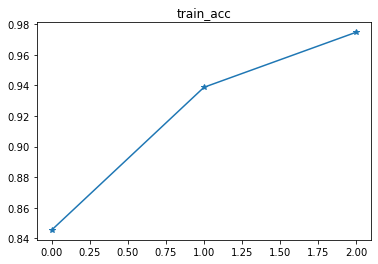

In [15]:
plt.plot(acc, marker='*')
plt.title('train_acc')

Text(0.5, 1.0, 'train_loss')

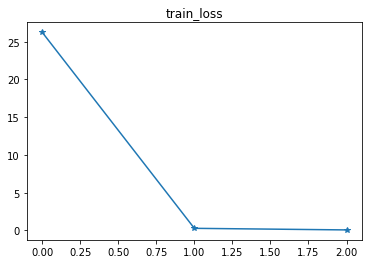

In [16]:
plt.plot(loss, marker='*')
plt.title('train_loss')

Text(0.5, 1.0, 'val_acc')

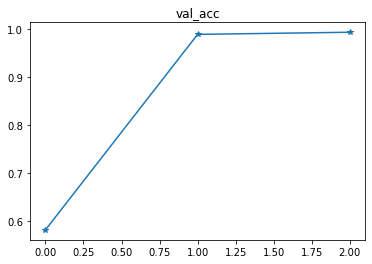

In [17]:
plt.plot(val_acc, marker='*')
plt.title('val_acc')

Text(0.5, 1.0, 'val_loss')

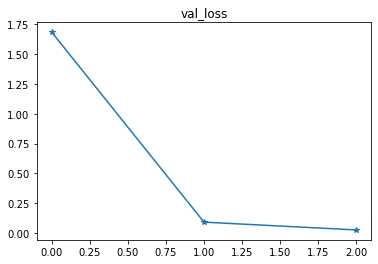

In [18]:
plt.plot(val_loss, marker='*')
plt.title('val_loss')

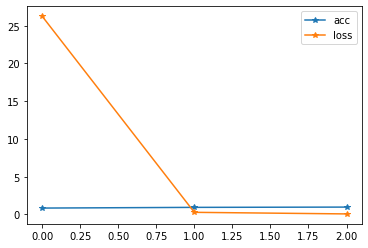

In [12]:
import matplotlib.pyplot as plt
plt.plot(acc, marker='*')
plt.plot(loss, marker='*')
plt.legend(('acc','loss'))
plt.show()

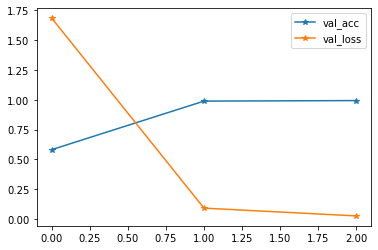

In [11]:
plt.plot(val_acc, marker='*')
plt.plot(val_loss, marker='*')
plt.legend(('val_acc','val_loss'))
plt.show()

In [4]:
print(train_data[1][0].shape)
print(train_data[1][0])
print(type(train_data[1][0]))
print(type(train_data[1][0][0]))
# for i in range(14):
#     print(train_data[i][1])
#     p = model.predict(train_data[i][0])
#     print(p)
#     print()

(18, 224, 224, 3)
[[[[133. 121. 131.]
   [110.  98. 108.]
   [119. 107. 117.]
   ...
   [130. 124. 136.]
   [174. 168. 180.]
   [134. 128. 140.]]

  [[118. 106. 116.]
   [ 97.  85.  95.]
   [ 97.  85.  95.]
   ...
   [151. 145. 157.]
   [113. 107. 119.]
   [203. 197. 209.]]

  [[115. 103. 113.]
   [129. 117. 127.]
   [139. 127. 137.]
   ...
   [153. 147. 159.]
   [133. 127. 139.]
   [150. 144. 156.]]

  ...

  [[119. 113. 127.]
   [111. 105. 119.]
   [116. 110. 124.]
   ...
   [130. 126. 141.]
   [117. 113. 128.]
   [157. 153. 168.]]

  [[ 78.  72.  86.]
   [130. 124. 138.]
   [114. 108. 122.]
   ...
   [150. 146. 161.]
   [173. 169. 184.]
   [136. 132. 147.]]

  [[100.  94. 108.]
   [112. 106. 120.]
   [131. 125. 139.]
   ...
   [132. 128. 143.]
   [124. 120. 135.]
   [147. 143. 158.]]]


 [[[  0.   0.   0.]
   [  0.   0.   0.]
   [  0.   0.   0.]
   ...
   [  0.   0.   0.]
   [  0.   0.   0.]
   [  0.   0.   0.]]

  [[  0.   0.   0.]
   [  0.   0.   0.]
   [  0.   0.   0.]
   ...
   

In [24]:
model.save('leaves_classify') # 保存模型，先要创建一个leaves_classify目录

INFO:tensorflow:Assets written to: leaves_classify\assets
